<a href="https://colab.research.google.com/github/thiagoreys/Machine_Learning_-_SKlearn/blob/main/Machine_Learning_com_SKlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre o curso

<div style="display: flex; justify-content: center;">
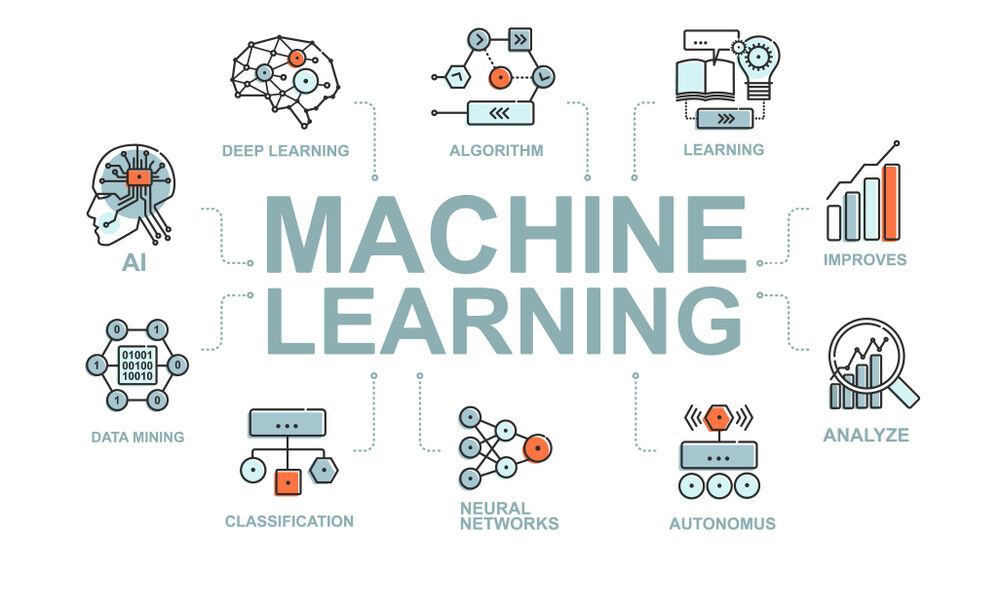
</div>

Neste primeiro curso de **Machine Learning** e Classificação, analisaremos **quatro projetos** e conjuntos de dados diferentes, sobre os quais tentaremos classificar informações em categorias distintas.

No **primeiro projeto** iniciaremos o conceito de classificações em machine learning, utilizando estimadores para analisar características triviais de animais e conseguir afirmar que se trata de um porco ou cachorro. Trata-se de um exemplo simples para que possamos introduzir o conceito de classificação e seu processo de estudo, treino e teste.

O **segundo projeto** é analisar se usuários que acessaram determinadas páginas de um site irão ou não comprar um produto específico. Então, estamos classificando entre duas opções de classes: "comprar ou não comprar", "sim" e "não", ou numericamente falando, "0" ou "1".

O **terceito projeto** envolve a análise de dados de trabalhos *freelancers* de desenvolvimento de sites. Nesta etapa, iremos analisar quais os projetos tem maiores chances de serem concluídos com base nos preços e tempo estipulados para as suas finalizações.

No **quarto projeto** e último projeto, iremos analisar vendas de carros; a ideia é descobrirmos se determinados carros serão vendidos ou não com base no preço de cada um. Dessa forma, quando um cliente decide anunciar seu carro em site, podemos sugerir uma faixa de preço que facilitará o processo de venda.

# Projeto 1 - Introdução a classificação

Neste primeiro projeto, usaremos um exemplo ilustrativo para entendermos como funciona o machine learning. A ideia é diferenciar dois animais com características diferentes: um porco e um cachorro.

Cada animal será descrito por meio de três características (*features*): se o pelo é longo ou curto; se as pernas são longas ou curtas; e se o animal emite o som "au-au" ou não.

`Features = (pelo longo, perna curta, faz auau)`
* `0 = não`
* `1 = sim`



In [279]:
porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

dados = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]

`Classes = (cachorro, porco)`
* `0 = cachorro`
* `1 = porco`


In [280]:
classes = [1, 1, 1, 0, 0, 0]

Pronto, com nossos dados estabelecidos, agora podemos iniciarmos nossos trabalhos. Iremos começar criando um modelo LinearSVC, da biblioteca do [sklearn.svm](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [281]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(dados, classes)

LinearSVC()

Agora testaremos nosso modelo com um animal misterioso.

In [282]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([0])

O modelo apontou que é um cachorro [0], para nosso animal que possui pelo longo, perna curta, faz auau. O até faz sentido, não é mesmo?

Vamos testar nosso modelo com outros animais.

In [283]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

testes = [misterio1, misterio2, misterio3]
previsoes = model.predict(testes)
previsoes

array([0, 1, 0])

O modelo apontou que o primeiro animal é um cachorro, o segundo um porco e o terceiro um cachorro novamente. Entretanto, aqui temos as verdadeiras classificações deles:

In [284]:
classes_reais = [0,1,1]   # O que eles são de verdade

Bom, o nosso modelo conseguiu acertar o primeiro e o segundo, mas errou o terceiro. O que é razoável, pela infima quantidade de dados que apresentamos para o seu aprendizado.

In [285]:
previsoes == classes_reais

array([ True,  True, False])

In [286]:
corretos = (previsoes == classes_reais).sum()
total = len(testes)
taxa_acertos = corretos/total
taxa_acertos

0.6666666666666666

O que nos dá uma taxa de acertos (acurácia) de 66,66%, para o nosso teste.

## Acurácia de teste

Podemos fazer o cálculo da acurácia de uma maneira mais direta, utilizando a função `accuracy_score` do módulo [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [287]:
from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(classes_reais, previsoes)
taxa_de_acerto

0.6666666666666666

In [288]:
print(f'A taxa de acertos foi de: {round(taxa_acertos * 100, 2)} %')

A taxa de acertos foi de: 66.67 %


Já criamos um modelo que foi treinado e testado, mas alguns nomes de variáveis precisam ser refinados. Temos seis itens diferentes, e cada um deles possui três features divergentes. Tais itens foram inseridos em um conjunto que chamamos de dados.

Porém, dados é um nome muito genérico. De forma geral, os dados, que constituem um conjunto de features que serão analisados, são pensados como uma função matemática.

Portanto, chamaremos nosso modelo de f( ) e passaremos para ele os dados(x). O modelo nos devolverá y, isto é, a classe. Dessa forma, f(x) = y.

Contudo, o x e y estão sendo usados somente para treinar o algorítimo. Logo, usaremos os nomes `treino_x` e `treino_y`. Em inglês, é comum encontrar esses nomes como `train_x` e `train_y`. As classes muitas vezes são chamadas de `labels`, ou seja, etiquetas, afinal teremos classificações para cada um dos itens analisados.

Então vamos reescrever o código com os nomes mais adequados para as variáveis.

In [289]:
treino_x = [porco1, porco2,  porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1,1,1,0,0,0] # labels / etiquetas

In [290]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(treino_x, treino_y)

LinearSVC()

In [291]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0, 1, 1]

previsoes = model.predict(teste_x)

In [292]:
from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print("Taxa de acerto:", round(taxa_de_acerto * 100, 2))

Taxa de acerto: 66.67


# Projeto 2 - Trabalhando com dados reais

Agora iremos trabalhar com dados reais em nosso **segundo projeto**, onde iremos analisar se usuários que acessaram determinadas páginas de um site irão ou não comprar um produto específico.

## Lendo dados da internet

In [293]:
import pandas as pd

In [294]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"

In [295]:
dados = pd.read_csv(uri)
dados.head()

home  how_it_works  contact  bought
0     1             1        0       0
1     1             1        0       0
2     1             1        0       0
3     1             1        0       0
4     1             1        0       0

Nela, encontramos uma tabela com quatro colunas diferentes, e na qual cada item representa um usuário que acessou um determinado site. Neste site, temos três páginas diferentes: a principal (*home*); a *how_it_works*, que explica o funcionamento do site; e *contact*, para entrar em contato.

Em cada uma dessas três colunas, que são as *features*, temos `1` ou `0`, indicando se um usuário específico acessou essa página ou não, respectivamente. Por enquanto não nos importa saber a ordem de páginas acessada pelo usuário.

Também temos uma quarta coluna (*bought*) indicando se esse usuário comprou o produto (`1`) ou não (`0`).

Algumas vezes preferimos trabalhar com as *features* em português. Para modificar as nomeações em inglês que já estamos utilizando, usaremos uma funcionalidade do Pandas que possibilita a renomeação das colunas: `dados.rename(columns)`. Em seguida, passaremos um mapa, que nada mais é que um dicionário do Python em que declaramos qual será o nome das respectivas colunas:

In [296]:
mapa = {"home": "principal",
        "how_it_works": "como_funciona",
        "contact": "contato",
        "bought": "comprou"}

dados = dados.rename(columns = mapa)

Agora precisamos separar nossas colunas de *features* `['principal','como_funciona','contato']` que chamaremos de X, da coluna que iremos fazer as estimativas `['comprou']` que charemos de Y.

In [297]:
x = dados[['principal', 'como_funciona', 'contato']]
x.head()

principal  como_funciona  contato
0          1              1        0
1          1              1        0
2          1              1        0
3          1              1        0
4          1              1        0

In [298]:
y = dados['comprou']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [299]:
dados.shape

(99, 4)

## Separando os dados de treino e teste

Agora vamos pegar 75% dados para treinar nossa IA.

In [300]:
treino_x = x[:75]
treino_y = y[:75]

E os 25% que sobrou será a nossa amostra de teste.

In [301]:
teste_x = x[75:]
teste_y = y[75:]

In [302]:
print(f"Estamos utilizando {len(treino_x)} amostras para treino e {len(teste_x)} amostras para teste.")

Estamos utilizando 75 amostras para treino e 24 amostras para teste.


Separadas as amostras, agora já podemos treinar e testar nosso modelo.


In [303]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()   # Criando o modelo
modelo.fit(treino_x, treino_y)   # Iniciando o treinamento

LinearSVC()

In [304]:
previsoes = modelo.predict(teste_x)  # Testando o modelo
acuracia = accuracy_score(teste_y, previsoes)   # Acurácia do teste

print(f"Obtivemos uma acurácia de {acuracia * 100:.2f}%")

Obtivemos uma acurácia de 95.83%


Fizemos um processo manual de separação de dados de treino e teste, porém, existe um método automático utilizando a própria biblioteca do *SkLearn*.

In [305]:
from sklearn.model_selection import train_test_split

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25)

In [306]:
print(f"Agora utilizaremos {len(treino_x)} amostras para treino e {len(teste_x)} amostras para teste.")

Agora utilizaremos 74 amostras para treino e 25 amostras para teste.


In [307]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()   # Criando o modelo
modelo.fit(treino_x, treino_y)   # Iniciando o treinamento

LinearSVC()

In [308]:
previsoes = modelo.predict(teste_x)  # Testando o modelo
acuracia = accuracy_score(teste_y, previsoes)   # Acurácia do teste

print(f"Obtivemos uma acurácia de {acuracia * 100:.2f}%")

Obtivemos uma acurácia de 100.00%


Quando fazemos a separação dos dados utilizando a função `train_test_split`, os dados são separados de forma aleatória, apesar de manterem a mesma proporção. Portanto, mesmo rodando o mesmo algorítmo, é possível obter resultados diferentes.

Entretanto, é possível remover essa aleatoriedade desse método, modificando o parâmetro `random_state`, e é isso que iremos fazer. Para isso, basta colocarmos um número qualquer nele que será utilizado como uma constante para organização dos valores. Essa constante é chamada de `SEED` (semente).

In [309]:
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25)

In [310]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()   # Criando o modelo
modelo.fit(treino_x, treino_y)   # Iniciando o treinamento

previsoes = modelo.predict(teste_x)  # Testando o modelo
acuracia = accuracy_score(teste_y, previsoes)   # Acurácia do teste

print(f"Obtivemos uma acurácia de {acuracia * 100:.2f}%")

Obtivemos uma acurácia de 96.00%


Pronto, agora sempre que rodarmos o algorítmo obteremos o mesmo valor de acurácia, que neste caso é de 96%.

## Estratificação

Podemos melhorar a qualidade dos valores que utilizamos como amostra de treino e teste.

In [311]:
treino_y.value_counts()

0    47
1    27
Name: comprou, dtype: int64

In [312]:
teste_y.value_counts()

0    19
1     6
Name: comprou, dtype: int64

Se analisarmos a proporção entre os que compraram e não compraram no teste e no treino, observamos que existe um desequilíbrio. Isso é um problema para a analise de dados, pois o modelo pode ficar enviesado. Porém, podemos resolver isso com a **estratificação**, que nada mais é que um método para equilibrar as proporções entre os valores de teste e treino.

Para usar este método, basta adcionar o parâmetro `stratify` na função de separação com o valor de referência para a estratificação, que no nosso caso é o `y`.

In [313]:
from sklearn.model_selection import train_test_split

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)

In [314]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()   # Criando o modelo
modelo.fit(treino_x, treino_y)   # Iniciando o treinamento

previsoes = modelo.predict(teste_x)  # Testando o modelo
acuracia = accuracy_score(teste_y, previsoes)   # Acurácia do teste

print(f"Obtivemos uma acurácia de {acuracia * 100:.2f}%")

Obtivemos uma acurácia de 96.00%


Neste caso, não obtivemos diferença na acurácia do teste, mas existirão casos que esse pequeno ajuste farão uma grande diferença.

Se verificarmos agora as proporções entre os valores de treino e teste, veremos que agora os valores estão mais equilibrados.

In [315]:
treino_y.value_counts()

0    49
1    25
Name: comprou, dtype: int64

In [316]:
teste_y.value_counts()

0    17
1     8
Name: comprou, dtype: int64

# Projeto 3 - Baixa dimensionalidade

Nosso terceito projeto envolve a análise de dados de trabalhos freelancers de desenvolvimento de sites. Nesta etapa, iremos analisar quais os projetos tem maiores chances de serem concluídos com base nos preços e tempo estipulados para as suas finalizações.

Para isso, precisamos realizar a importação da nova base de dados que iremos trabalhar.

In [317]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dados = pd.read_csv(uri)
dados.head()

unfinished  expected_hours  price
0           1              26    192
1           1              88   9015
2           1              89   2577
3           1              42    275
4           1              39    170

In [318]:
dados.shape

(2157, 3)

Agora a nossa nova tabela de dados possui 2157 linhas e 3 colunas para analisarmos. Cada linha representa um projeto diferente de site web, como o site de uma escola, de uma padaria e assim por diante.

As pessoas interessadas em criar sites para seus respectivos negócios submetem o projeto a uma empresa e estipulam o número de horas para que o projeto seja criado (expected_hours) , bem como a quantia a ser paga (price). A coluna unfinished mostra os projetos que foram finalizados (0) e os que não foram finalizados (1).

Queremos trabalhar com os nomes das tabelas em português, portanto renomearemos os títulos por meio do método rename(), passando paras as colunas as definições que escreveremos em uma variável renomear.

In [319]:
renomear = {'unfinished': 'inacabado', 'expected_hours': 'horas_esperadas', 'price': 'preco'}

dados.rename(columns = renomear, inplace=True)
dados.head()

inacabado  horas_esperadas  preco
0          1               26    192
1          1               88   9015
2          1               89   2577
3          1               42    275
4          1               39    170

Entretanto, a coluna `inacabado` pode gerar confusões, afinal 0 seriam os projetos finalizados e 1 os não finalizados. Podemos organizar as nossas `features` com mais clareza de forma a evitar erros no desenvolvimento do projeto.

In [320]:
dados.replace({'inacabado': {1:0, 0:1} }, inplace=True)
dados.rename(columns = {'inacabado': 'finalizado'}, inplace=True)
dados.head()

finalizado  horas_esperadas  preco
0           0               26    192
1           0               88   9015
2           0               89   2577
3           0               42    275
4           0               39    170

Pronto, agora temos a coluna finalizado, onde 0 são os projetos que não foram finalizados e 1 os que foram finalizados. Desta forma, as informações podem serem lidas de uma maneira mais intuitiva.

O que queremos agora é visualizar as informações de outra forma. No projeto anterior, havia três features e um y. Neste caso, temos duas features (horas_esperadas e preco) e a classificação (finalizado).

Com essas duas features, podemos desenhar em um eixo as horas_esperadas e em outro o preco. Para isso, usaremos uma famosa biblioteca do Python chamada Seaborn.

<Axes: xlabel='horas_esperadas', ylabel='preco'>

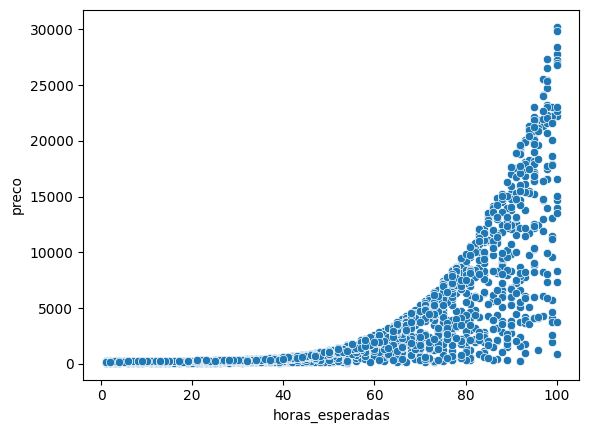

In [321]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='preco', data=dados )

O que gostaríamos de avaliar agora não é apenas o número de horas esperadas e o preço, mas sim explorar mais quais são os projetos finalizados ou não.

Existem várias maneiras de tentarmos visualizar as duas classes (0 ou 1 para finalizado) no gráfico. Uma delas é por meio de cores. Utilizaremos a mesma estrutura do método scatterplot, mas dessa vez passando o parâmetro hue, que será baseado na coluna finalizado, pintando os pontos de acordo com a classe atribuída à essa coluna:

<Axes: xlabel='horas_esperadas', ylabel='preco'>

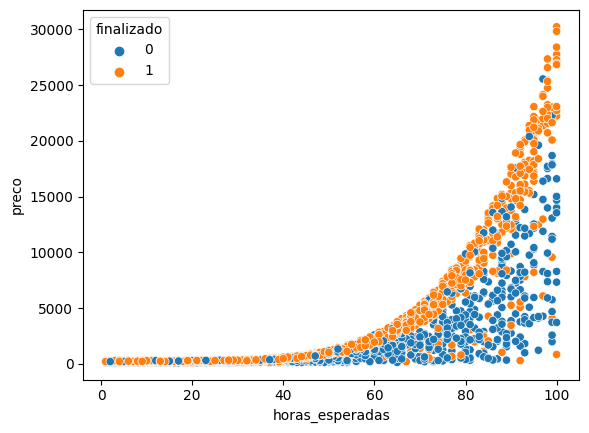

In [322]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

Ao executarmos o código obtivemos um gráfico com a mesma estrutura, mas com diferentes tonalidades: laranja para projetos finalizados e azul para projetos não finalizados.

Perceba que a medida em que horas_esperadas aumenta, os agrupamentos de projetos finalizados se deslocam para faixas maiores de preco.

Dessa forma, aprendemos que algumas informações podem ser visualizadas de forma mais clara apenas adicionando diferenças de cor. Uma outra alternativa é realizar uma plotagem relativa por meio de relplot(). Com esse método, ao invés das cores, queremos plotar os dados em colunas (col) diferentes, uma para os projetos finalizados e outra para os não-finalizados:

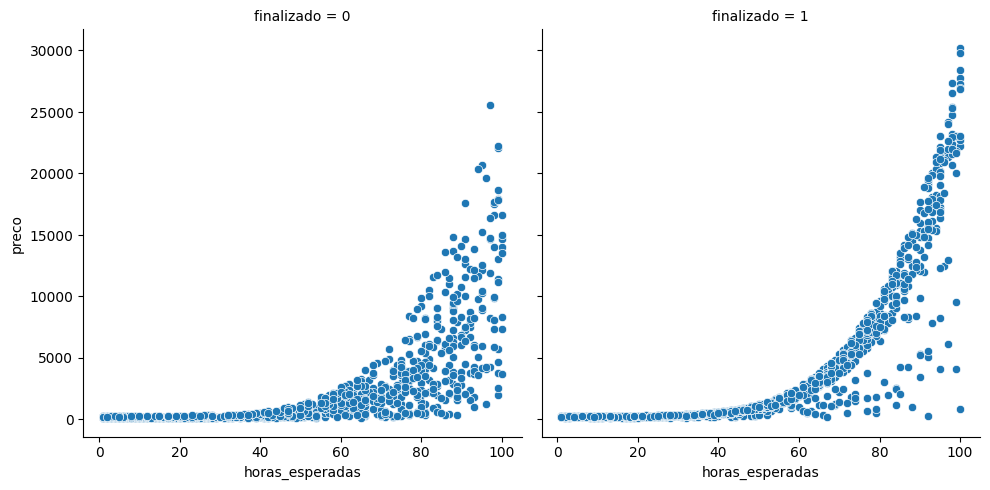

In [323]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

Analisando o gráfico resultante, podemos perceber que parece existir uma faixa mínima de preço para os projetos finalizados.

Também é possível inserir cores em plotagens relativas, adicionando outro recurso visual para a organização dos dados. Para tanto, voltaremos a inserir o parâmetro hue no código:

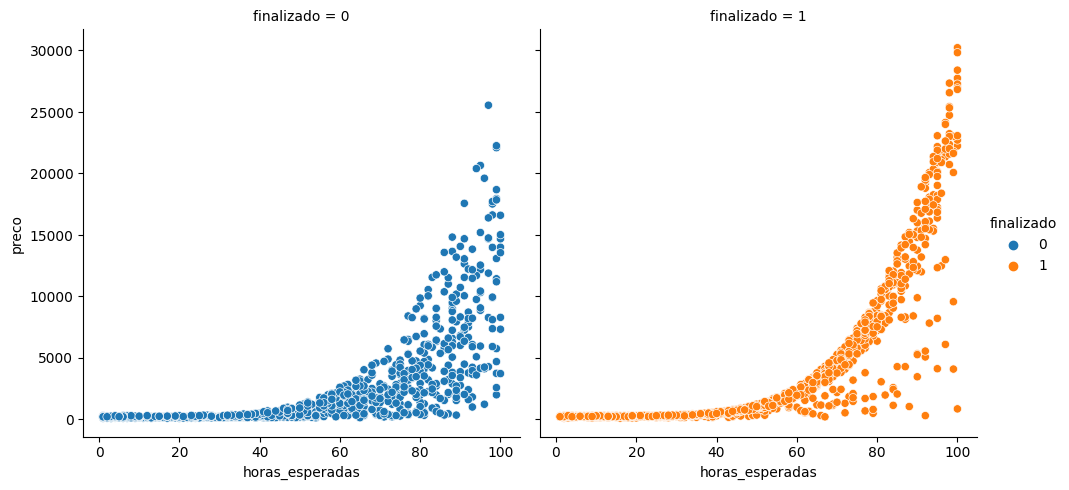

In [324]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados);

Agora já podemos realizar a modelagem com os dados.

In [325]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [326]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 115

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.")

modelo = LinearSVC(random_state = SEED)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 1617 elementos e testaremos com 540 elementos.
A acurácia foi de 55.93%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


A acurácia não parece ser boa, mas essa é a base de um algoritmo para tentar prever resultados. Mas devemos nos perguntar: como saber se 55.93% é de fato ruim?

Para obtermos uma resposta satisfatória, precisamos de um recurso comparativo. Portanto, inventaremos um algoritmo bem simples que terá como previsão que todos os projetos são finalizados, isto é, os 540 elementos de teste serão 1.

Com o Numpy, a biblioteca que gera matrizes, faremos com que 540 elementos tenham o valor 1. Feito isso, estipularemos que essas são as previsões, as chamaremos de previsoes_do_thiago, e testaremos sua acurácia.

In [327]:
import numpy as np
previsoes_do_thiago = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_do_thiago) * 100
print(f"A acurácia do Thiago foi de {acuracia:.2f}%.")

A acurácia do Thiago foi de 52.59%.


Ou seja, com esse algoritmo simples, tivemos um resultado de 52.59% - um valor muito próximo ao do algoritmo anterior, com uma diferença de apenas 3,34%. Isto é, ele é pouco melhor do que sempre prever 1.

O que chamamos de previsoes_do_thiago, na verdade é a linha de base, ou baseline, e é o parâmetro que devemos superar quando construímos estimadores. Devemos ser muito melhores que as porcentagens apresentadas na baseline, e por isso é muito importante que ele exista ainda que teste sempre a mesma classe. Posteriormente iremos analisar detalhadamente o que erramos para termos um acurácia tão baixa.

---

Agora iremos analisar cada uma das classificações que realizamos. Para isso, vamos montar o mesmo gráfico do scatterplot() mas dessa vez apenas com os dados do teste.

<Axes: xlabel='horas_esperadas', ylabel='preco'>

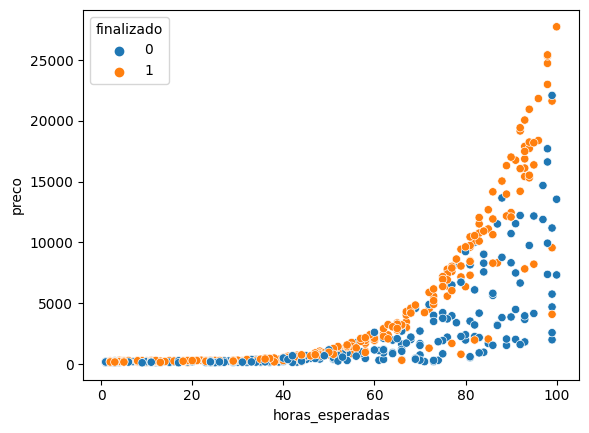

In [328]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

Repare que não há diferenças notáveis entre este gráfico, que é apenas dos dados de testes, para o gráfico com os dados gerais. Então o que houve de errado com o nosso teste?

Quando estamos trabalhando com duas dimensões (e somente nesses casos), podemos colorir todos os pixels do gráfico de acordo com as possíveis previsões do classificador que criamos. Por exemplo, será ou não vendido um projeto na faixa de valor 25000 com tempo de construção de 60h?

O algoritmo deve ser capaz de aprender a curva ascendente que vemos no gráfico: quanto mais bem pago e com maior tempo de elaboração, maior chance do projeto ser de fato concluído.

Existem diversas maneiras de realizarmos esse procedimento, mas são maneiras de trabalhar com matrizes e que não necessariamente serão executadas explicitamente no nosso dia-a-dia. Como estamos em um caso bastante específico, iremos abordá-las apenas com duas dimensões, já que nos ajudarão a compreender com clareza qual é o problema do nosso algoritmo.

Do conjunto teste_x, coletaremos o valor mínimo (min()) para horas_esperadas, e atribuiremos o nome x_min a esse valor. Faremos um procedimento similar para x_max, mas dessa vez coletando o valor máximo. Repetiremos essa estrutura para teste_y, mas agora trabalhando com preco mínimo e máximo. Por fim, imprimiremos o resultado.

In [329]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(f'Horas min: {x_min} \nHoras máx: {x_max } \nPreço min: {y_min} \nPreço máx: {y_max}')

Horas min: 1 
Horas máx: 100 
Preço min: 100 
Preço máx: 27738


Agora que temos a amplitude dos dados, precisamos definir quantos pixels haverá em cada dimensão. Para essa escala, 100 pixels por eixo parece estar bom. Se multiplicarmos 100 x 100 (altura e largura), teremos um total de 10.000 pontos, o que já é mais do que suficiente.

Portanto, precisamos segmentar cada eixo em 100 partes, que é a quantidade de pixels que escolhemos. Para isso, basta pegarmos a amplitude (max - min) e dividirmos por 100, que teremos o passo entre cada elemento.

Vamos criar um array para cada eixo com essas segmentações.

In [330]:
pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

In [331]:
eixo_x

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [332]:
eixo_y

array([  100.  ,   376.38,   652.76,   929.14,  1205.52,  1481.9 ,
        1758.28,  2034.66,  2311.04,  2587.42,  2863.8 ,  3140.18,
        3416.56,  3692.94,  3969.32,  4245.7 ,  4522.08,  4798.46,
        5074.84,  5351.22,  5627.6 ,  5903.98,  6180.36,  6456.74,
        6733.12,  7009.5 ,  7285.88,  7562.26,  7838.64,  8115.02,
        8391.4 ,  8667.78,  8944.16,  9220.54,  9496.92,  9773.3 ,
       10049.68, 10326.06, 10602.44, 10878.82, 11155.2 , 11431.58,
       11707.96, 11984.34, 12260.72, 12537.1 , 12813.48, 13089.86,
       13366.24, 13642.62, 13919.  , 14195.38, 14471.76, 14748.14,
       15024.52, 15300.9 , 15577.28, 15853.66, 16130.04, 16406.42,
       16682.8 , 16959.18, 17235.56, 17511.94, 17788.32, 18064.7 ,
       18341.08, 18617.46, 18893.84, 19170.22, 19446.6 , 19722.98,
       19999.36, 20275.74, 20552.12, 20828.5 , 21104.88, 21381.26,
       21657.64, 21934.02, 22210.4 , 22486.78, 22763.16, 23039.54,
       23315.92, 23592.3 , 23868.68, 24145.06, 24421.44, 24697

Agora a ideia é criarmos um grid entre os dois eixos, multiplicando as opções de acordo com as diferentes possibilidade de custo de projeto e tempo de execução. Temos na biblioteca do Numpy o np.meshgrid(), que consegue mesclar um grid . Esse método recebe como parâmetros o eixo_x e eixo_y, e devolve o conteúdo é xx e yy. Vamos analisar xx:

In [333]:
xx, yy = np.meshgrid(eixo_x, eixo_y)

In [334]:
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [335]:
yy

array([[  100.  ,   100.  ,   100.  , ...,   100.  ,   100.  ,   100.  ],
       [  376.38,   376.38,   376.38, ...,   376.38,   376.38,   376.38],
       [  652.76,   652.76,   652.76, ...,   652.76,   652.76,   652.76],
       ...,
       [26908.86, 26908.86, 26908.86, ..., 26908.86, 26908.86, 26908.86],
       [27185.24, 27185.24, 27185.24, ..., 27185.24, 27185.24, 27185.24],
       [27461.62, 27461.62, 27461.62, ..., 27461.62, 27461.62, 27461.62]])

Com o código estruturado desta maneira, o que temos é a repetição do eixo x 100 vezes, e o mesmo ocorre com eixo y. Ou seja, ainda não mesclamos realmente esses dados, pois estão em listas diferentes. Para o procedimento da certo, precisamos que as sequências numéricas fiquem apenas em uma única lista. Para fazermos isso, podemos usar o ravel():

In [336]:
xx.ravel()[:150]

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01,  1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,
        8.92,  9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84,
       17.83, 18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75,
       26.74, 27.73,

Como podemos ver, o ravel() faz com que as listas numéricas sejam concatenadas uma após a outra, fazendo que os dados fiquem alinhadas de forma sequêncial em um único array.

Faremos o mesmo procedimento para yy, e então concatenaremos xx e yy por meio de np.c_. Essa operação nos devolverá os pontos.

Ao executarmos o código veremos a concatenação, com os devidos pares em cada eixo.

In [337]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.746162e+04],
       [9.802000e+01, 2.746162e+04],
       [9.901000e+01, 2.746162e+04]])

Agora, nosso trabalho é, a partir do modelo, fazer as previsões (predict() para todos esses pontos. Como resultado, teremos uma série de números, que são as classificações. Chamaremos essas classificações de Z.

In [338]:
Z = modelo.predict(pontos)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


Precisamos nos atentar para o formato (shape) do array Z, que está como 10000.

In [339]:
Z.shape

(10000,)

Mas se analisarmos xx, verificaremos que suas dimensões são 100 x 100:

In [340]:
xx.shape

(100, 100)

Precisamos redimensionar (reshape) o array de 10000 de acordo com xx.

In [341]:
Z = Z.reshape(xx.shape)
Z.shape

(100, 100)

In [342]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

Finalmente, poderemos plotar esses dados. Para isso, usaremos a biblioteca Matplotlib, cujas importações costumam ser plt. Novamente, queremos que os pontos sejam espalhados (scatter()), mas não usaremos o scatterplot() do Seaborn pois, nesse caso, queremos um controle mais refinado dessa plotagem.

O método scatter() deverá receber teste_x.horas_esperadas e teste_x.preco. E definiremos a cor por meio do argumento c que se baseará no teste_y.

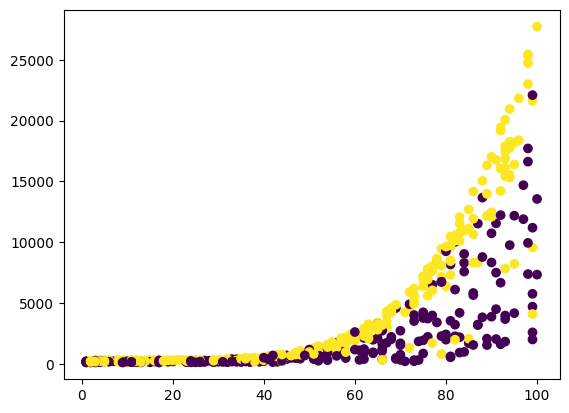

In [343]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y)

Os pontos que constituem nosso gráfico ficaram muito grandes. Para reduzirmos o tamanho dos pontos e melhorarmos a visualização dos dados, modificaremos o parâmetro s (de size):

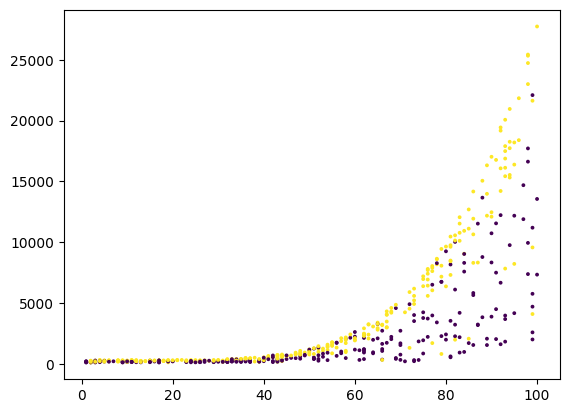

In [344]:
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=3)

Já temos o plot básico, nossa próxima tarefa é desenhar a classificação que estipulamos: se o valor for 0, pintaremos de uma cor, se for 1, de outra. Além disso, entre esses números, adicionaremos uma cor diferente para que possamos visualizar a curva que separa as duas classificações do algoritmo.

Para tanto, usaremos plt.contourf() (de countor, ou "contorno"), que receberá xx, yy e Z. Para que a tonalidade não seja muito forte, escreveremos alpha=0.3, aumentando a transparência.

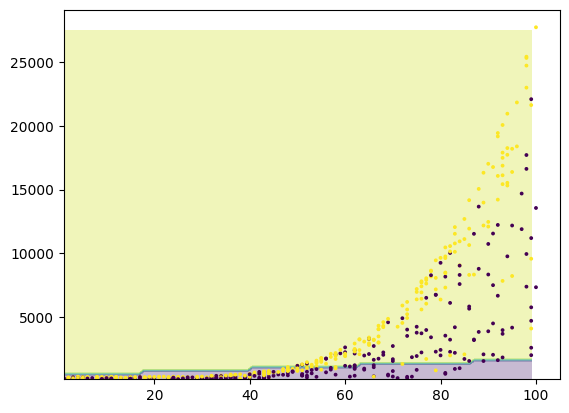

In [345]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=3)

Perceba que a curva de decisão do algoritmo quase não é visível, o que quer dizer que os palpites para a finalização do projeto estão enviesados. Precisamos de algum modelo estimador que seja capaz de aprender um padrão mais inteligente. O algoritmo que estamos utilizando só é capaz de aprender uma linha reta, que não serve para classificação.

## Estimadores não lineares

No módulo `sklearn.smv`, teremos diversas variações de algoritmos baseados em uma única ideia: [Suport Vector Machines](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm), isto é, SVM. Estávamos utilizando anteriormente o LinearSVC, ou Suport Vector Classification, que é baseado em relacionamentos lineares.

Queremos utilizar um algoritmo mais independente e que encontre relacionamentos diferentes, portanto tentaremos o [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).

In [346]:
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)  # Fixa o random_state = SEED para todas as funções que utilizam o np.random

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%.")

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 59.07%.


Ou seja, um resultado de 59.07%, inferior ao que obtivemos usando LinearSVC. O que pode ter acontecido? Vamos descobrir qual tipo de relacionamento foi realizado pelo SVC.

Vamos plotar um novo gráfico para estas estimativas, para podermos analisarmos melhor.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


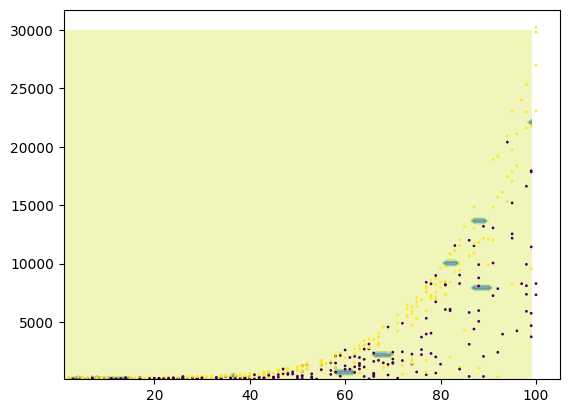

In [347]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

Analisando a plotagem, percebemos que de fato foram realizados relacionamentos não lineares. Há pequenos agrupamentos de cor diferente que representam as previsões do algoritmo para projetos que terão valor 1, e o restante será 0. Não estamos tendo um palpite muito inteligente.

Isso o ocorre devido a discrepância entre os eixos: em X, teremos valores de 0 a 100, e em Y de 0 a 30000. Esses algoritmos são muito suscetíveis a escala, e darão menos valor para variações menores, como é o caso de X.

Escalas distintas em features causam um desbalanço no algoritmo. Uma alternativa para solucionarmos esse problema é reescalarmos todo o nosso projeto para uma faixa similar. Faremos isso utilizando o escalador padrão do Sklearn, o [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), que é uma fase de pré-processamento e padronização de valores.

Queremos elaborar uma nova escala a partir dos valores de X para treino. Para tanto, criaremos um `StandardScaler()`, que será atribuído à uma variável scaler, e treinaremos esse processo baseado em treino_x. Em seguida, transformaremos treino_x em um novo treino_x que já está na nova escala. Em seguida, repetiremos o processo para teste_x.

Desse modo, todas as features serão utilizadas para treinar o processo de escala, e por fim, atualizadas de acordo com as novas medidas. Já sabemos que não é uma boa prática sobrescrever variáveis, pois podemos nos perder em meio às nomeclaturas. Portanto, renomearemos os dados "crus" (os originais) adicionando o termo raw - ou seja, raw_treino_x e raw_teste_x.

In [348]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%.")

Treinaremos com 1617 elementos e testaremos com 540 elementos.
A acurácia foi de 66.85%.


Tivemos uma taxa de acerto ainda melhor que a do LinearSVC(), mas ainda precisamos visualizar isso em um gráfico:

In [349]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

AttributeError: ignored

Ao tentarmos executar a célula, tivemos a seguinte mensagem de erro:

`AttributeError: 'numpy.ndarray' object has no attribute 'horas_esperadas'`

Isso aconteceu porque nossas novas variáveis teste_x e treino_x são arrays de arrays (que, na nova escala, só possuem dois valores).

In [350]:
treino_x

array([[-1.20810685, -0.58850785],
       [-0.25992095, -0.48069545],
       [ 1.46086087,  0.13548927],
       ...,
       [-0.57598292, -0.58492075],
       [ 1.21503489,  0.45294796],
       [ 1.1799169 ,  1.18670998]])

Antes, essas variáveis (agora representadas por raw_teste_x e raw_treino_x) representavam dataframes do Pandas e continham as informações horas_esperadas e preco, que não funcionam mais para nossa plotagem.

Para obtermos a primeira coluna desse array do Numpy (equivalente a horas_esperadas), usaremos `teste_x[:,0]` - ou seja, todas as linhas e a coluna 0 do array teste_x. Como esse será nosso eixo X, atribuiremos o resultado a uma variável data_x.

Repetiremos o processo para a criação de data_y, pegando todas as linhas da coluna 1 desse array:

In [351]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

Em seguida, alteraremos o código de plotagem de acordo com as novas nomeações:

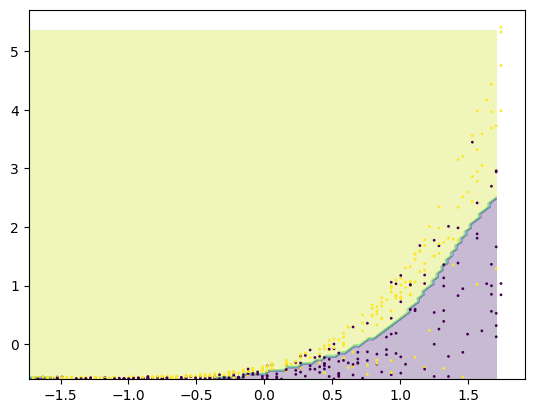

In [352]:
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

Por mais que LinearSVC tenha tido uma taxa razoável de 64.44%, a linha de decisão na plotagem foi horrível. Na prática, utilizar o SVC parece ser uma decisão melhor: temos uma curva de decisão bem marcada e o estimador possui uma taxa de acerto um pouco maior, de 66.85%.

Aprendemos que existem diversos estimadores, os dois que utilizamos até agora são baseados em um algoritmo chamado Suport Vector Machine. Um deles possui uma restrição e consegue apenas estabelecer relacionamentos lineares, e o outro é capaz de elaborar curvas e atinge uma taxa de acurácia mais interessante no caso do nosso projeto.

# Projeto 4 - Dummy classifiers e árvore de decisão

Já conhecemos dois algoritmos diferentes que funcionam de base para estimadores que tentam modelar como nossos dados são classificados. Agora, com o foco em resolver outro problema, usaremos um tipo novo de estimador.

Usaremos um [novo arquivo](https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv) para esta aula. Trata-se de um banco de dados fictício em que cada linha representa um carro à venda em uma loja online. Os carros são de diversos donos diferentes, e alguns desses carros foram vendidos e outros não. Abaixo temos os cinco primeiros carros da tabela.

In [353]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

Unnamed: 0  mileage_per_year  model_year      price sold
0           0             21801        2000   30941.02  yes
1           1              7843        1998   40557.96  yes
2           2              7109        2006   89627.50   no
3           3             26823        2015   95276.14   no
4           4              7935        2014  117384.68  yes

De acordo com estes dados, tentaremos classificar se um carro será vendido ou não. Pensando no negócio da empresa, com esse tipo de informação, ela poderia ajudar seus clientes a concretizar sua venda, criando condições mais atrativas para possíveis compradores com base em dados reais e de acordo com as características de cada carro.

Perceba que temos uma coluna não nomeada, onde os índices estão replicados. Como ela não apresenta nenhuma utilidade, podemos remove-la.

In [354]:
dados.drop(columns='Unnamed: 0', inplace=True)
dados.head()

mileage_per_year  model_year      price sold
0             21801        2000   30941.02  yes
1              7843        1998   40557.96  yes
2              7109        2006   89627.50   no
3             26823        2015   95276.14   no
4              7935        2014  117384.68  yes

Como nos projetos anteriores, renomearemos as colunas para português, para que fique mais fácil de trabalharmos.

In [355]:
renomear = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}

dados.rename(columns=renomear, inplace=True)
dados.head()

milhas_por_ano  ano_do_modelo      preco vendido
0           21801           2000   30941.02     yes
1            7843           1998   40557.96     yes
2            7109           2006   89627.50      no
3           26823           2015   95276.14      no
4            7935           2014  117384.68     yes

In [356]:
trocar = {
    'no': 0,
    'yes': 1
}

dados.vendido = dados.vendido.map(trocar)
dados.head()

milhas_por_ano  ano_do_modelo      preco  vendido
0           21801           2000   30941.02        1
1            7843           1998   40557.96        1
2            7109           2006   89627.50        0
3           26823           2015   95276.14        0
4            7935           2014  117384.68        1

Já temos os dados em português e os valores binários, mas ainda temos algumas alterações a realizar na coluna "ano_do_modelo". Os anos estão com uma diferença pequena entre eles; por exemplo "2000" e "1998", há uma diferença de dois anos, mas se pensarmos 2/2000 x 100 = 0,1 , portanto o peso de dois anos é 0,1%.

No caso desse projeto, ao invés de usarmos o ano do modelo, usaremos a idade desde a fabricação do carro, ou seja, quão velho ou novo é um determinado veículo. Criaremos a coluna idade_do_modelo, que será dados.ano_do_modelo. Para tanto, precisaremos coletar o ano atual, por exemplo 2018, menos a data de fabricação do carro.

In [357]:
from datetime import datetime

ano_atual = datetime.today().year
dados.insert(2, 'idade_do_modelo', ano_atual - dados.ano_do_modelo)
dados.head()

milhas_por_ano  ano_do_modelo  idade_do_modelo      preco  vendido
0           21801           2000               23   30941.02        1
1            7843           1998               25   40557.96        1
2            7109           2006               17   89627.50        0
3           26823           2015                8   95276.14        0
4            7935           2014                9  117384.68        1

Agora, na coluna idade_do_modelo, temos a idade dos veículos em relação ao ano atual. Desse modo, temos todas as features necessárias para prosseguirmos com o projeto. Entretanto, por mais que milhas_por_ano seja uma unidade de medida válida, no Brasil estamos acostumados com quilômetros. Portanto, criaremos uma coluna nova que apresentará esses valores em quilômetros (km_por_ano). Sabendo que cada milha equivale a 1.60934km, faremos a seguinte operação:

In [358]:
km_por_ano = round(dados.milhas_por_ano * 1.60934, 2)

dados.insert(1, 'km_por_ano', km_por_ano)
dados.head()

milhas_por_ano  km_por_ano  ano_do_modelo  idade_do_modelo      preco  \
0           21801    35085.22           2000               23   30941.02   
1            7843    12622.05           1998               25   40557.96   
2            7109    11440.80           2006               17   89627.50   
3           26823    43167.33           2015                8   95276.14   
4            7935    12770.11           2014                9  117384.68   

   vendido  
0        1  
1        1  
2        0  
3        0  
4        1

Agora podemos deletar as colunas antigas que não serão utilizadas.

In [359]:
dados.drop(columns=['milhas_por_ano', 'ano_do_modelo'], inplace=True)
dados.head()

km_por_ano  idade_do_modelo      preco  vendido
0    35085.22               23   30941.02        1
1    12622.05               25   40557.96        1
2    11440.80               17   89627.50        0
3    43167.33                8   95276.14        0
4    12770.11                9  117384.68        1

Agora já podemos classificar os dados, separando X (as colunas que representam nossas features) e Y (se o carro foi vendido ou não):

In [360]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

No projeto anterior, usávamos a classificação do LinearSVC. Vamos reaproveitar esse código e testar esse estimador:

In [361]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia foi de 46.88%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Tivemos uma acurácia de 46.88%, mas ainda não temos base comparativa para sabermos o quão bom ou ruim é esse resultado.

## Dummy classifiers e SVC

Para definirmos se o resultado que obtemos anteriormente é bom ou ruim, ainda precisamos de uma base comparativa, estipulando qual seria o mínimo de acerto aceitável - por exemplo, se todos os palpites fossem 0 ou 1.

Já fizemos esse procedimento anteriormente por meio de np.ones(), criando um array de 1 com o número de elementos que queríamos utilizar. Como esse é um processo bastante recorrente, as bibliotecas possuem ferramentas que facilitam nosso trabalho.

Como podemos verificar na documentação da biblioteca SKLearn, ele possui um estimador conhecido como [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html), que é basicamente o que o nome diz: um classificador "bobo". Isso porque ele possui várias estratégias bem simples de classificação, e que podem ser passadas como parâmetro.



Para nossos testes, primeiramente importaremos esse classificador e criaremos a variável dummy como padrão, definindo alguma estratégia de classificação como parâmetro. Em seguida, trabalharemos com os métodos tradicionais fit() e o score(), que retorna a acurácia do modelo que estamos testando.

Primeiramente, iremos testar com o parâmetro `stratified`.

In [362]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print(f"A acurácia do dummy stratified foi de {acuracia:.2f}%.")

A acurácia do dummy stratified foi de 52.44%.


Agora iremos testar o `most_frequent`.

In [363]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy='most_frequent')
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print(f"A acurácia do dummy most_frequent foi de {acuracia:.2f}%.")

A acurácia do dummy most_frequent foi de 58.00%.


Para este caso, o `most_frequent` obteve uma acurácia melhor, portanto é mais razoável utiliza-lo como baseline para superarmos.

Agora tentaremos detectar padrões não necessariamente lineares para nossos dados. Poderíamos cogitar a ideia de utilizar o SVC, mas é importante lembrar que ele (além de outros estimadores) não pode ser usado diretamente com dados em várias escalas diferentes.

Aprendemos no projeto anterior que precisamos reescalar nossos dados utilizando o StandardScaler() do pré-processamento.

Reaproveitaremos o código do projeto anterior e o revisaremos em busca de adaptações necessárias. Nele, temos o SEED fixo, a quebra dos dados de treino e teste e a separação do treino raw (os dados antes de serem reescalados).

Em seguida, o StandardScaler(), a partir da média, desloca esses dados e divide pelo desvio padrão, criando um intervalo. Com esse treino, os dados crus são transformados em treino_x e teste_x, que então são utilizados no treino e no teste do nosso modelo. Por fim, imprimimos a acurácia:

In [364]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%.")

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia foi de 77.48%.


Com esse resultado, tivemos em ganho muito grande de acurácia em relação à baseline. No entanto, ainda não estamos compreendendo quais critérios o algoritmo usa para definir qual carro será vendido e qual não.

Não é trivial estudarmos a estrutura interna desses algoritmos para entendermos por que estão sendo tomadas determinadas decisões. Algoritmos de classificação como o Support Vector Machine são difíceis de estudar e interpretar, e, por esse motivo, são apelidados de "caixa preta" (ou black box, em inglês).

Mas será que existem classificadores que conseguem exibir com clareza quais são as regras de decisão que são tomadas para chegar na classificação? Na verdade sim, e é isso que veremos a seguir.

## Árvore de decisão

Até o momento, utilizamos dois classificadores reais baseados em Support Vector Machine, o LinearSVC e SVC. Usamos, ainda, dois classificadores simples (Dummy Classifiers) para definir nosso baseline.

Com o SVC, depois de reescalarmos os dados, a acurácia tem um ganho impressionante. Porém, ainda não temos um algoritmo de classificação que nos forneça suas regras internas para que possamos entender como certas decisões são tomadas.

Existem algoritmos que exibem uma sequência de decisões com base nos dados fornecidos, como por exemplo um carro ter menos quilometragens rodadas e ser mais novo, e como essas decisões influenciam na classificação, em uma espécie de "árvore de decisões".

Não à toa, tais classificadores são chamados de decision tree classifiers. Existem vários algoritmos desse tipo, e nesse curso usaremos o [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) padrão do próprio SKLearn.

A forma de utilizarmos esse classificador é bastante parecida com tudo o que fizemos até agora: vamos copiar o código que criamos para o SVC(), utilizando, ao invés disso, o `DecisionTreeClassifier()`, que deverá ser importado do módulo `sklearn.tree`.

Lembrando que você não precisa ter todas essas importações visíveis, porque elas já foram realizadas anteriormente. Porém, elas serão mantidas no código para que você possa colocá-las facilmente em um arquivo Python.

In [365]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%.")

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia foi de 73.12%.


Porém, nosso foco agora é compreender como as decisões estão sendo tomadas. Para tanto, usaremos outra funcionalidade do módulo [sklearn.tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) para exportar a visualização gráfica da árvore de decisões. O nome dessa função é `export_graphviz`.

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(modelo)

Não é o que esperávamos, certo? O que obtemos, na verdade, foi o formato de um gráfico. Esse formato é chamado de `dot_data`, e ele servirá de base para a plotagem.

In [367]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(modelo)

Para importamos o gráfico, precisaremos utilizar a biblioteca `graphviz`. Mas antes disso, precisamos instala-la no Colab.

In [368]:
!pip install graphviz

Agora já podemos importa-la. Para plotar o no Gráfico, iremos utilizar a função `Source` colocando como parâmetro o nosso dot_data.

In [369]:
import graphviz

graphviz.Source(dot_data)

Como podemos perceber, o Gráfico ficou muito grande, o que torna mais complexo o nosso processo de análise. Uma das características que podem ser trabalhadas para otimizar a interpretação de uma árvore de decisões é a profundidade (`max_depth`): quantas condições diferentes queremos que o algoritmo analise antes de fazer a classificação.

Em `modelo = DecisionTreeClassifier()`, modificaremos a `max_depth` para 2:

In [370]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%.")

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia foi de 76.84%.


Com isso, poderemos plotar novamente o gráfico e visualizar a árvore de decisões do classificador em nossa tela:

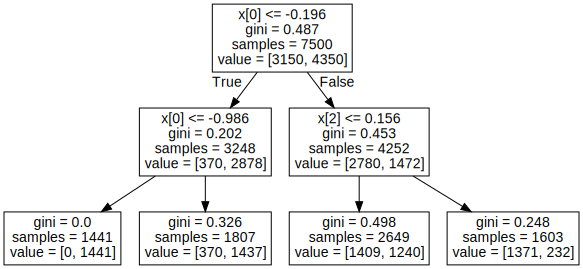

In [371]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo)
graphviz.Source(dot_data)

Contudo, ela ainda não é muito simples de ser lida. Por exemplo, X[0] corresponde aos dados X na primeira coluna, e X[1] na segunda. Ou seja, precisaremos conferir as correspondências na tabela o tempo todo, o que não é muito prático.

Para melhorarmos esse ponto, passaremos alguns parâmetros. Por exemplo, o nome das features será `x.columns`. Também deixaremos os quadros coloridos e com bordas arredondadas (`filled = True, rounded _ True`). Por fim, adicionaremos o nome das classes: não, que equivale a 0; e sim, que equivale a 1. Isso porque, por padrão, a árvore de decisão não exporta o nome das classes automaticamente.

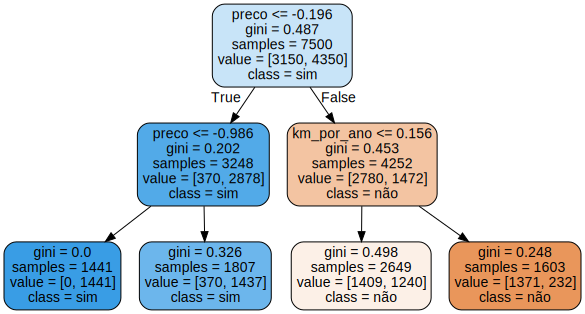

In [372]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo, feature_names = x.columns,
                           filled = True, rounded = True,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

Agora a árvore ficou mais bonita e de fácil vizualização. Entretanto, ainda há um ponto a ser analisado: no primeiro quadro perceberemos que o preço utilizado para definir a classificação é -0.196, um valor negativo. O que isso significa? Que as pessoas estão pagando para vender seus carros?!

Na verdade, as features foram normalizadas, isto é, fizemos a escala retirando a média e dividindo pelo desvio padrão. Dessa forma, esses não são os valores originais das features, e não estamos lidando com o preço real de um carro.

As árvores de decisão não exigem que realizemos reescalas para que tenhamos um funcionamento adequado, portanto podemos retirar o trecho de código relacionado ao `StandardScaler()`. Assim poderemos utilizar diretamente o `raw_treino_x` e o `raw_teste_x`.

In [373]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.")

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%.")

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia foi de 76.84%.


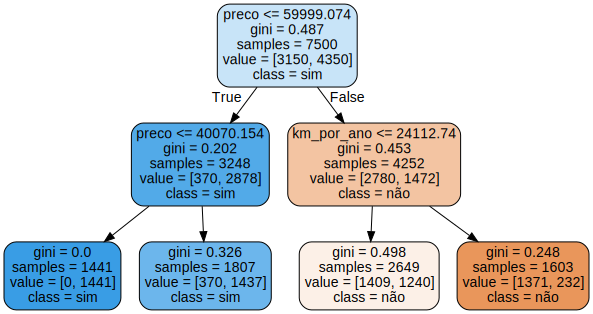

In [374]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo, feature_names = x.columns,
                           filled = True, rounded = True,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

Agora podemos ler e interpretar a **árvore de decisão** do algoritmo.

No primeiro quadro, temos `preco: 59999.074`. Se o preço for menor ou igual a este valor, o carro será enquadrado na classe "sim", e nosso algoritmo tomará a decisão de que ele será vendido. Se o preço for menor ou igual a `40070.154`, o algoritmo também decidirá que ele será vendido. A decisão também será positiva se o preço for maior que este valor, mas com um pouco menos de certeza (representada por um tom mais claro de azul).

Se o preço for maior que `59999.074`, o classificador tomará uma decisão negativa. A próxima decisão será tomada de acordo com `km_por_ano`: se este valor for maior que `24112.74`, o algoritmo decidirá que o carro não será vendido; se for menor ou igual, a decisão será a mesma, mas com uma certeza menor.

Existem outras informações na árvore de decisão, por exemplo `samples`, que nos mostra quantos dados são enquadrados em determinada situação. No primeiro quadro ,o valor de samples será de `7500`, pois essa é a quantidade total de dados que disponibilizamos; no segundo quadro da esquerda (em azul), teremos `3248`, com o restante (`4252`) no quadro da esquerda (em tom salmão); e assim por diante.

Para medir se vale a pena quebrar a árvore em dois pedaços em cada uma das decisões, o algoritmo utiliza diversos parâmetros. Um deles é o `gini`, que também é exibido nesses quadros. Não entraremos em detalhes sobre o funcionamento desses parâmetros no momento, pois elas serão abordados no curso de [otimização de algoritmos](https://cursos.alura.com.br/course/machine-learning-otimizacao-de-modelos-atraves-de-hiperparametros).

Vamos fazer outro teste, alterando o máximo de profundidade (`max_depth`) para 3:

In [375]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos.")

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%.")

Treinaremos com 7500 elementos e testaremos com 2500 elementos.
A acurácia foi de 79.28%.


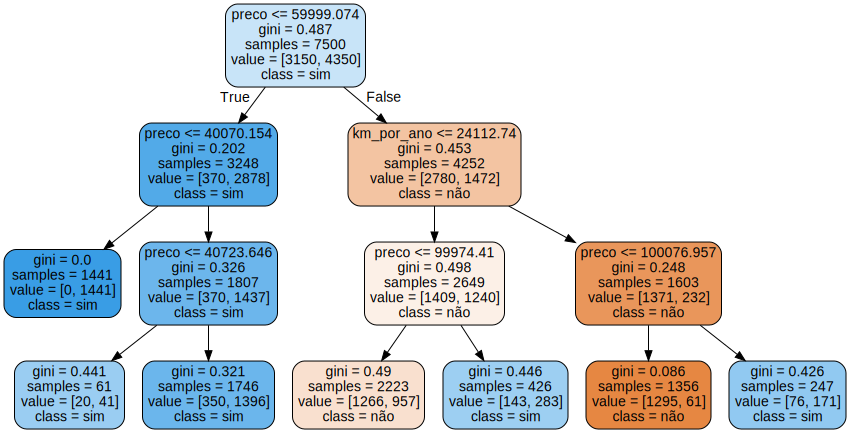

In [376]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo, feature_names = x.columns,
                           filled = True, rounded = True,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

Os algoritmos do tipo **árvore de decisão** possuem diversos parâmetros, como o critério para separar os nós da árvore, o mínimo de *samples* para separar um nó ou definir um nó final, assim como a profundidade. Sabendo disso, também podemos tentar encontrar um conjunto de parâmetros que otimize nosso classificador - uma questão mais aprofundada em *machine learning* e que abordaremos mais tarde na carreira.

Por enquanto, nosso trabalho é simplesmente carregar os dados, manipulá-los, treinar modelos e verificar, com base em treino e teste, quão bom esse modelo é. Como exemplo, temos essa árvore de profundidade 3, com resultados muito bons para nossos objetivos (principalmente em comparação com a *baseline*).

Podemos explorar muitos outros classificadores na documentação do [Sklearn](https://scikit-learn.org/stable/supervised_learning.html), estudar cada um deles e tentar aplicá-los em nossos projetos.